In [722]:
cd


/Users/qiji


In [723]:
cd Desktop


/Users/qiji/Desktop


In [724]:
cd titanic


/Users/qiji/Desktop/titanic


In [3]:
import pandas as pd
import csv
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Imputer 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.pylab as plt 
%matplotlib inline
from sklearn import datasets
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import math

In [49]:
df_train=pd.read_csv('train.csv')
df_train_EDA=pd.read_csv('train.csv')
X_test=pd.read_csv('test.csv')
y_test=pd.read_csv('gender_submission.csv')

In [103]:
print len(df_train)
print len(y_test)

891
418


In [51]:
X_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [52]:
y_test.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [53]:
df_train_EDA
df_train_EDA.loc[(df_train_EDA.Age.isnull()),'Age']=0
df_train_EDA.loc[(df_train_EDA.Cabin.isnull()),'Cabin']=0
df_train_EDA.loc[(df_train_EDA['Cabin'] != 0),'Cabin']=1
#plt.boxplot(df_train_EDA['Age'])

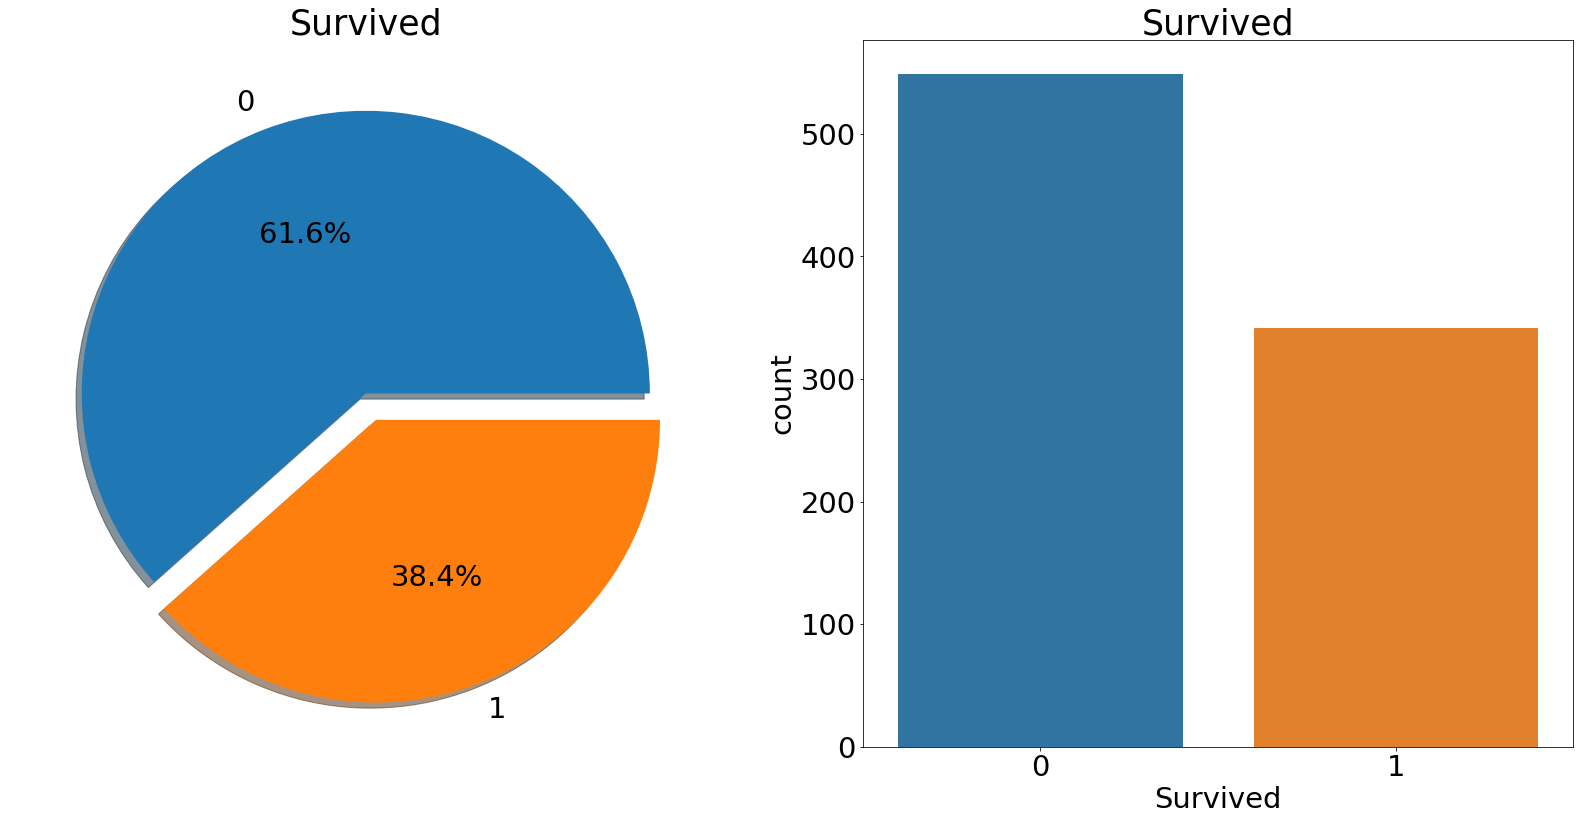

In [85]:
f,ax=plt.subplots(1,2,figsize=(28,13))
df_train_EDA['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_train_EDA,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

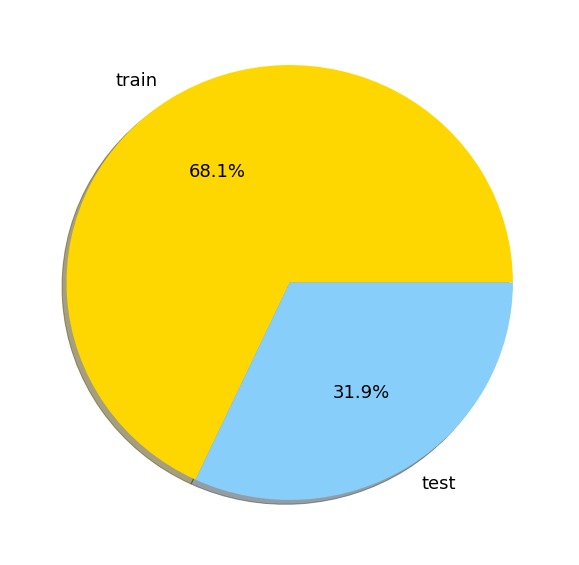

In [106]:
plt.figure(figsize=[10,10])
plt.rc('font', size=18) 
labels = ['train','test']
sizes = [len(df_train),len(y_test)]
colors = ['gold', 'lightskyblue']
trace = plt.pie(sizes, labels=labels,colors=colors,shadow=True,autopct='%1.1f%%')

#py.iplot([trace], filename='basic_pie_chart')

Text(0,0.5,u'Cabin')

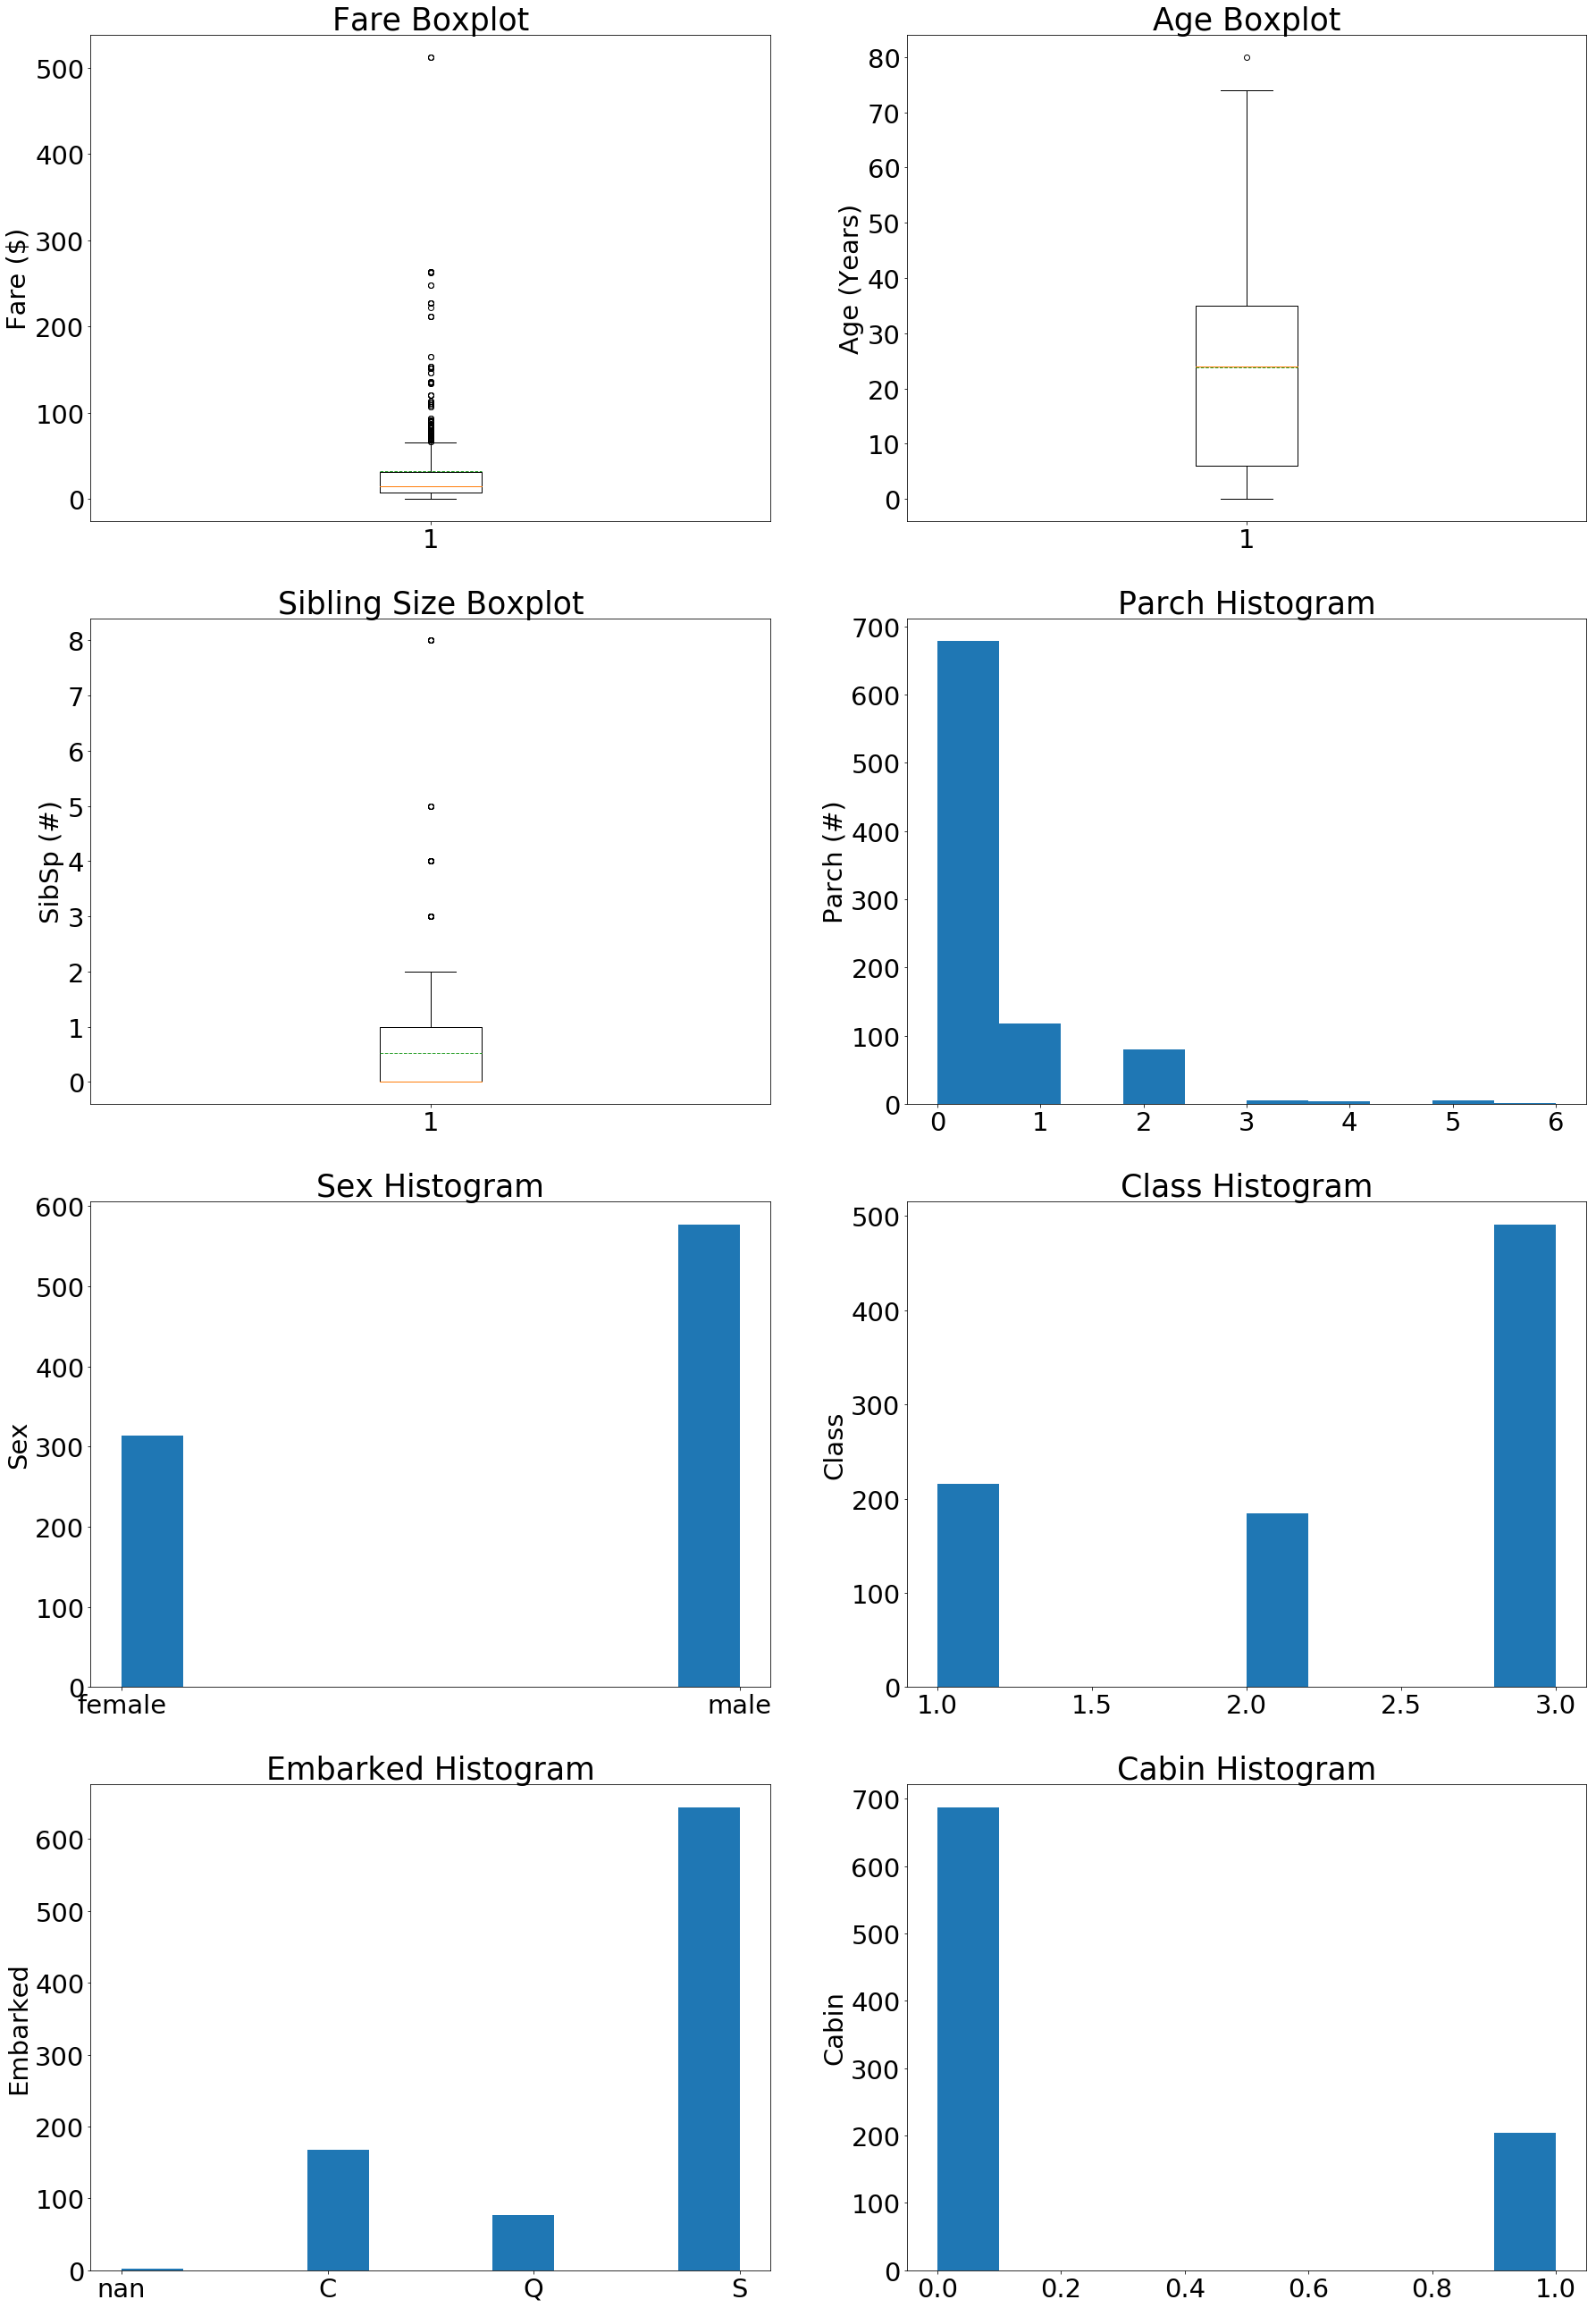

In [77]:
plt.figure(figsize=[30,46])
plt.rc('font', size=29)  
plt.subplot(421)
plt.boxplot(x=df_train_EDA['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(422)
plt.boxplot(df_train_EDA['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(423)
plt.boxplot(df_train_EDA['SibSp'], showmeans = True, meanline = True)
plt.title('Sibling Size Boxplot')
plt.ylabel('SibSp (#)')


plt.subplot(424)
plt.hist(x=df_train_EDA['Parch'])
plt.title('Parch Histogram')
plt.ylabel('Parch (#)')

plt.subplot(425)
plt.hist(x=df_train_EDA['Sex'])
plt.title('Sex Histogram')
plt.ylabel('Sex')


plt.subplot(426)
plt.hist(x=df_train_EDA['Pclass'])
plt.title('Class Histogram')
plt.ylabel('Class')

plt.subplot(427)
plt.hist(x=df_train_EDA['Embarked'])
plt.title('Embarked Histogram')
plt.ylabel('Embarked')

plt.subplot(428)
plt.hist(x=df_train_EDA['Cabin'].tolist())
plt.title('Cabin Histogram')
plt.ylabel('Cabin')

# plt.subplot(339)
# plt.hist(x = [df_train_EDA[df_train_EDA['Survived']==1]['SibSp'], df_train_EDA[df_train_EDA['Survived']==0]['SibSp']], 
#          stacked=True, color = ['g','r'],label = ['Survived','Dead'])
# plt.title('Sibling Histogram by Survival')
# plt.xlabel('Sibling Size (#)')
# plt.ylabel('# of Passengers')
# plt.legend()

In [ ]:
plt.hist(df_train['Survived'])

(array([ 266.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  152.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

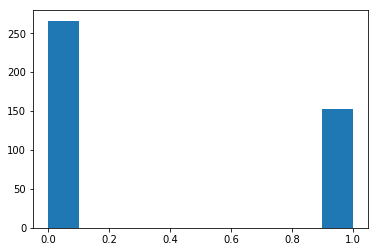

In [731]:
plt.hist(y_test['Survived'])

(array([ 216.,    0.,    0.,    0.,    0.,  184.,    0.,    0.,    0.,  491.]),
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 10 Patch objects>)

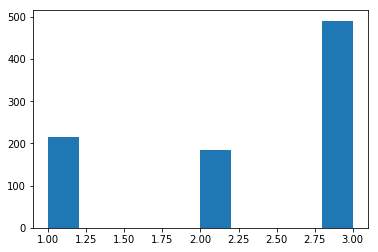

In [732]:
plt.hist(df_train['Pclass'])

(array([ 107.,    0.,    0.,    0.,    0.,   93.,    0.,    0.,    0.,  218.]),
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 10 Patch objects>)

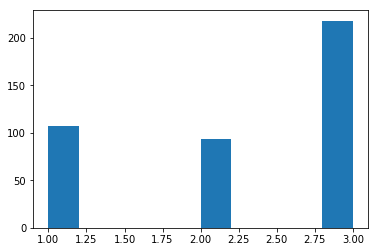

In [733]:
plt.hist(X_test['Pclass'])

(array([ 732.,  106.,   31.,    2.,   11.,    6.,    0.,    0.,    0.,    3.]),
 array([   0.     ,   51.23292,  102.46584,  153.69876,  204.93168,
         256.1646 ,  307.39752,  358.63044,  409.86336,  461.09628,
         512.3292 ]),
 <a list of 10 Patch objects>)

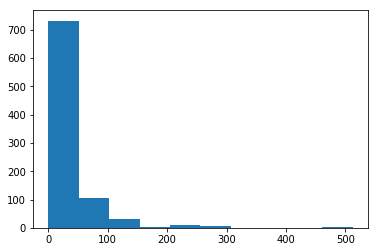

In [734]:
plt.hist(df_train['Fare'])

(array([ 78.,  85.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([   0.     ,   51.23292,  102.46584,  153.69876,  204.93168,
         256.1646 ,  307.39752,  358.63044,  409.86336,  461.09628,
         512.3292 ]),
 <a list of 10 Patch objects>)

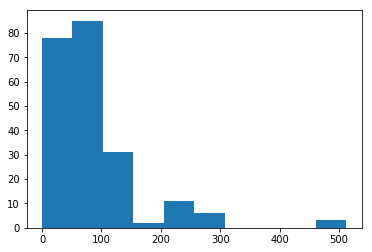

In [735]:
plt.hist(df_train[df_train['Pclass']==1].Fare)

(array([  6.,  88.,  16.,  49.,   7.,  11.,   0.,   0.,   2.,   5.]),
 array([  0.  ,   7.35,  14.7 ,  22.05,  29.4 ,  36.75,  44.1 ,  51.45,
         58.8 ,  66.15,  73.5 ]),
 <a list of 10 Patch objects>)

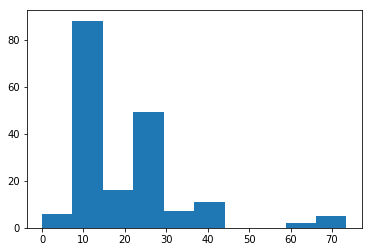

In [736]:
plt.hist(df_train[df_train['Pclass']==2].Fare)

(array([  14.,  325.,   75.,   25.,   26.,    6.,    6.,    0.,    7.,    7.]),
 array([  0.   ,   6.955,  13.91 ,  20.865,  27.82 ,  34.775,  41.73 ,
         48.685,  55.64 ,  62.595,  69.55 ]),
 <a list of 10 Patch objects>)

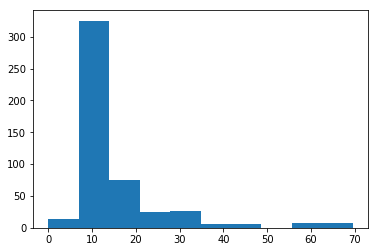

In [737]:
plt.hist(df_train[df_train['Pclass']==3].Fare)

In [738]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(array([  81.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  233.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

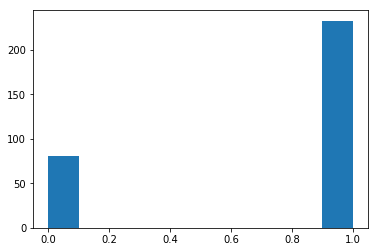

In [739]:
plt.hist(df_train[df_train['Sex']=='female'].Survived)

(array([ 468.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  109.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

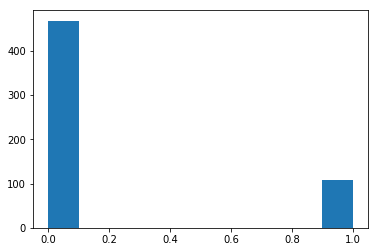

In [740]:
plt.hist(df_train[df_train['Sex']=='male'].Survived)

In [741]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


fare and Pclass -0.54
sib and parch 0.42

In [742]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [743]:
#df=df_train.sort_values(by=['Pclass','Fare'])

In [744]:
#df.to_csv('sortedtitanic.csv')

In [745]:
df_train['CategoricalFare'] = pd.qcut(df_train['Fare'], 4)

# fix missing value

In [746]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoricalFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(7.91, 14.454]"
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,"(7.91, 14.454]"
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(31.0, 512.329]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,"(14.454, 31.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"(7.91, 14.454]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"(14.454, 31.0]"


In [747]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [748]:
#cabin
df_train.loc[(df_train.Cabin.isnull()),'Cabin']=0
X_test.loc[(X_test.Cabin.isnull()),'Cabin']=0

In [749]:
df_train.loc[(df_train['Cabin'] != 0),'Cabin']=1
X_test.loc[(X_test['Cabin'] != 0),'Cabin']=1

In [750]:
#age
df_train['Initial']=0
for i in df_train:
    df_train['Initial']=df_train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

/Users/qiji/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


In [751]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [752]:
## Assigning the NaN Values with the Ceil values of the mean ages

df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age']=33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age']=36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age']=46

In [753]:
df_train.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           2
CategoricalFare    0
Initial            0
dtype: int64

In [754]:
df_train.groupby(['Pclass', 'Embarked','Sex'])['Fare', 'Age'].median()

Fare   Age
Pclass Embarked Sex                  
1      C        female  83.1583  36.0
                male    61.6792  35.0
       Q        female  90.0000  33.0
                male    90.0000  44.0
       S        female  79.6500  35.0
                male    35.0000  37.0
2      C        female  24.0000  22.0
                male    25.8604  30.5
       Q        female  12.3500  26.0
                male    12.3500  57.0
       S        female  23.0000  29.0
                male    13.0000  31.0
3      C        female  14.4583  17.0
                male     7.2292  33.0
       Q        female   7.7500  22.0
                male     7.7500  33.0
       S        female  14.4500  22.0
                male     8.0500  28.0

In [755]:
df_train[df_train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoricalFare,Initial
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,1,NaN,"(31.0, 512.329]",Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,1,NaN,"(31.0, 512.329]",Mrs


In [756]:
df_train.loc[(df_train.Embarked.isnull()),'Embarked']="C"

In [757]:
df_train['Sex']=(df_train['Sex'] =='male')*1

In [758]:
X_test['Sex']=(X_test['Sex'] =='male')*1

In [759]:
df_train.Embarked.value_counts()

S    644
C    170
Q     77
Name: Embarked, dtype: int64

In [760]:
df_train.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

# creat dummy variables

In [761]:
Embarked_d=pd.get_dummies(df_train.Embarked,prefix='Embarked')#.iloc[:,1:]

In [762]:
Sex_d=pd.get_dummies(df_train.Sex,prefix='Sex').iloc[:,1:]

In [763]:
df_train=pd.concat([df_train,Sex_d,Embarked_d],axis=1)

In [764]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoricalFare,Initial,Sex_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S,"(-0.001, 7.91]",Mr,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,C,"(31.0, 512.329]",Mrs,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S,"(7.91, 14.454]",Miss,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,S,"(31.0, 512.329]",Mrs,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S,"(7.91, 14.454]",Mr,1,0,0,1
5,6,0,3,"Moran, Mr. James",1,33.0,0,0,330877,8.4583,0,Q,"(7.91, 14.454]",Mr,1,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,1,S,"(31.0, 512.329]",Mr,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,0,S,"(14.454, 31.0]",Master,1,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,0,S,"(7.91, 14.454]",Mrs,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0,C,"(14.454, 31.0]",Mrs,0,1,0,0


In [765]:
Embarked_dt=pd.get_dummies(X_test.Embarked,prefix='Embarked')#.iloc[:,1:]

In [766]:
Sex_dt=pd.get_dummies(X_test.Sex,prefix='Sex').iloc[:,1:]

In [767]:
X_test=pd.concat([X_test,Sex_dt,Embarked_dt],axis=1)

In [768]:
X_test.columns

Index([u'PassengerId', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch',
       u'Ticket', u'Fare', u'Cabin', u'Embarked', u'Sex_1', u'Embarked_C',
       u'Embarked_Q', u'Embarked_S'],
      dtype='object')

In [769]:
df_train=df_train[['Survived','Pclass','Age','SibSp','Parch','Fare','Cabin','Sex_1','Embarked_C','Embarked_Q','Embarked_S']]

In [770]:
df_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_1,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
5,0,3,33.0,0,0,8.4583,0,1,0,1,0
6,0,1,54.0,0,0,51.8625,1,1,0,0,1
7,0,3,2.0,3,1,21.0750,0,1,0,0,1
8,1,3,27.0,0,2,11.1333,0,0,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,1,0,0


In [771]:
#age
X_test['Initial']=0
for i in X_test:
    X_test['Initial']=X_test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

/Users/qiji/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


In [772]:
X_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [773]:
# Assigning the NaN Values with the Ceil values of the mean ages

X_test.loc[(X_test.Age.isnull())&(X_test.Initial=='Mr'),'Age']=33
X_test.loc[(X_test.Age.isnull())&(X_test.Initial=='Mrs'),'Age']=36
X_test.loc[(X_test.Age.isnull())&(X_test.Initial=='Master'),'Age']=5
X_test.loc[(X_test.Age.isnull())&(X_test.Initial=='Miss'),'Age']=22
X_test.loc[(X_test.Age.isnull())&(X_test.Initial=='Other'),'Age']=46

In [774]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_1,Embarked_C,Embarked_Q,Embarked_S,Initial
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,Q,1,0,1,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,S,0,0,0,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,Q,1,0,1,0,Mr
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,S,1,0,0,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,S,0,0,0,1,Mrs
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,0,S,1,0,0,1,Mr
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,0,Q,0,0,1,0,Miss
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,0,S,1,0,0,1,Mr
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,0,C,0,1,0,0,Mrs
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,0,S,1,0,0,1,Mr


In [775]:
X_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
Sex_1          0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Initial        0
dtype: int64

In [776]:
X_test.groupby(['Pclass', 'Embarked','Sex'])['Fare', 'Age'].median()

Fare   Age
Pclass Embarked Sex                
1      C        0    81.17915  41.0
                1    73.26250  41.0
       Q        0    90.00000  37.0
       S        0    61.17500  39.0
                1    42.40000  41.0
2      C        0    32.36250  24.0
                1    15.03330  30.0
       Q        1    11.52915  48.0
       S        0    24.50000  23.0
                1    13.00000  27.5
3      C        0    11.48545  27.5
                1     7.22920  33.0
       Q        0     7.75000  22.0
                1     7.75000  33.0
       S        0    12.28750  22.0
                1     7.98750  27.0

In [777]:
X_test.loc[(X_test.Fare.isnull()),'Fare']=7.98750

In [778]:
X_test=X_test[['Pclass','Age','SibSp','Parch','Fare','Cabin','Sex_1','Embarked_C','Embarked_Q','Embarked_S']]

In [779]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_1,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,0,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,0,0,0,0,1
5,3,14.0,0,0,9.2250,0,1,0,0,1
6,3,30.0,0,0,7.6292,0,0,0,1,0
7,2,26.0,1,1,29.0000,0,1,0,0,1
8,3,18.0,0,0,7.2292,0,0,1,0,0
9,3,21.0,2,0,24.1500,0,1,0,0,1


In [863]:
X_test.to_csv('X_test.csv')

In [861]:
df_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_1,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
5,0,3,33.0,0,0,8.4583,0,1,0,1,0
6,0,1,54.0,0,0,51.8625,1,1,0,0,1
7,0,3,2.0,3,1,21.0750,0,1,0,0,1
8,1,3,27.0,0,2,11.1333,0,0,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,1,0,0


In [788]:
y_test=y_test['Survived']

In [780]:
X_train, y_train = df_train[df_train.columns.drop('Survived')], df_train['Survived']

In [866]:
model = LogisticRegression()
model.fit(X_train, y_train)
yl_pred = model.predict(X_test)

In [867]:
yl_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [868]:
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_test, yl_pred).ravel()

In [885]:
tpr_lr = float(tp)/(tp+fn) # recall or true positive rate
tnr_lr = float(tn)/(tn+fp) # true negative rate
ppv_lr= float(tp)/(tp+fp) # precision or positive predictive power
npv_lr = float(tn)/(tn+fn) # negative predictive power

In [879]:
f1_lr = 2.0/(1.0/ppv+1.0/tpr)

In [881]:
tpr_lr

0.9342105263157895

In [882]:
a_lr=accuracy_score(y_test, yl_pred)

In [883]:
confusion_matrix(y_test, yl_pred)

array([[249,  17],
       [ 10, 142]])

# ROC

In [894]:
 from sklearn import metrics
fpr_lr, tpr_lr, thresholds = metrics.roc_curve(y_test, yl_pred)

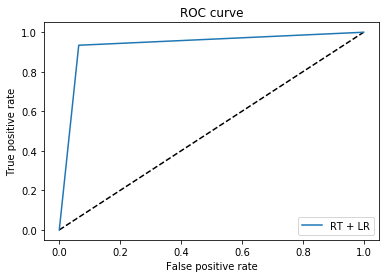

In [896]:
#logistic regression ROC
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='RT + LR')
#plt.plot(fpr_lr, tpr_lr, label='RF')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# no cabin

In [798]:
df1_train=df_train[['Survived','Pclass','Age','SibSp','Parch','Fare','Sex_1','Embarked_C','Embarked_Q','Embarked_S']]

In [799]:
X1_test=X_test[['Pclass','Age','SibSp','Parch','Fare','Sex_1','Embarked_C','Embarked_Q','Embarked_S']]

In [801]:
X1_train, y_train = df1_train[df1_train.columns.drop('Survived')], df1_train['Survived']

In [915]:
#LogisticRegression without cabin
model = LogisticRegression()
model.fit(X1_train, y_train)
ylnc_pred = model.predict(X1_test)

In [916]:
accuracy_score(y_test, ylnc_pred)

0.94497607655502391

In [914]:
 from sklearn import metrics
fpr_lnc, tpr_lnc, thresholds = metrics.roc_curve(y_test, ylnc_pred)

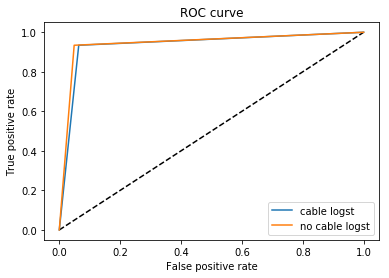

In [903]:
#logistic regression ROC
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='cable logst')
plt.plot(fpr_lnc, tpr_lnc, label='no cable logst')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Decsion tree

In [923]:
#decsion tree with cabin
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
yd_pred = model.predict(X_test)
accuracy_score(y_test, yd_pred)

0.78229665071770338

In [924]:
#decsion tree without cabin
model=DecisionTreeClassifier()
model.fit(X1_train,y_train)
ydnc_pred = model.predict(X1_test)
accuracy_score(y_test, ydnc_pred)

0.80861244019138756

# KNN

In [951]:
#KNN have cabin
model=KNeighborsClassifier()
model.fit(X_train,y_train)
yk_pred = model.predict(X_test)
accuracy_score(y_test, yk_pred)

0.67224880382775121

In [952]:
#KNN without cabin
model=KNeighborsClassifier()
model.fit(X1_train,y_train)
yknc_pred = model.predict(X1_test)
accuracy_score(y_test, yknc_pred)

0.67224880382775121

In [953]:
#svm linear  without cabin
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(X1_train,y_train)
ysnc_pred = model.predict(X1_test)
accuracy_score(y_test, ysnc_pred)

1.0

In [954]:
#SVM linear with cabin
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(X_train,y_train)
ys_pred = model.predict(X_test)
accuracy_score(y_test, ys_pred)

1.0

In [940]:
#svm rbf with cabin
model= svm.SVC(kernel='rbf')
model.fit(X_train,y_train)
ysr_pred = model.predict(X_test)
accuracy_score(y_test, ysr_pred)

0.66267942583732053

In [941]:
#svm rbf without cabin
model = svm.SVC(kernel='rbf')
model.fit(X1_train,y_train)
ysrnc_pred = model.predict(X1_test)
accuracy_score(y_test, ysrnc_pred)

0.66507177033492826

In [837]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Imputer 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.pylab as plt 
%matplotlib inline
from sklearn import datasets
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn.ensemble import BaggingClassifier

In [942]:
def bagprocess(X_train, y_train,X_test,y_test,n_estimators = 50): 
    bagging=BaggingClassifier(n_estimators = k)
    bagging.fit(X_train,y_train)
    ybr_pred = bagging.predict(X_train)
    a=accuracy_score(y_train, ybr_pred)
    trainerror=1-a
    ybe_pred = bagging.predict(X_test)
    a2=accuracy_score(y_test, ybe_pred)
    testerror=1-a2
    print(classification_report(y_train, ybr_pred)),(classification_report(y_test, ybe_pred))
    print 'training accuracy is',a,'testing accuracy is',a2
    return trainerror,testerror

             precision    recall  f1-score   support

          0       0.93      0.93      0.93       549
          1       0.88      0.89      0.89       342

avg / total       0.91      0.91      0.91       891
             precision    recall  f1-score   support

          0       0.87      0.77      0.82       266
          1       0.66      0.80      0.72       152

avg / total       0.79      0.78      0.78       418

training accuracy is 0.913580246914 testing accuracy is 0.77990430622
             precision    recall  f1-score   support

          0       0.96      0.97      0.96       549
          1       0.95      0.93      0.94       342

avg / total       0.96      0.96      0.95       891
             precision    recall  f1-score   support

          0       0.86      0.81      0.83       266
          1       0.70      0.76      0.73       152

avg / total       0.80      0.79      0.80       418

training accuracy is 0.955106621773 testing accuracy is 0.794258373206
 

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       549
          1       0.98      0.98      0.98       342

avg / total       0.99      0.99      0.99       891
             precision    recall  f1-score   support

          0       0.87      0.82      0.84       266
          1       0.71      0.79      0.75       152

avg / total       0.81      0.81      0.81       418

training accuracy is 0.986531986532 testing accuracy is 0.808612440191
             precision    recall  f1-score   support

          0       0.98      1.00      0.99       549
          1       0.99      0.97      0.98       342

avg / total       0.99      0.99      0.99       891
             precision    recall  f1-score   support

          0       0.87      0.83      0.85       266
          1       0.73      0.79      0.76       152

avg / total       0.82      0.82      0.82       418

training accuracy is 0.986531986532 testing accuracy is 0.818181818182


             precision    recall  f1-score   support

          0       0.99      0.99      0.99       549
          1       0.99      0.98      0.98       342

avg / total       0.99      0.99      0.99       891
             precision    recall  f1-score   support

          0       0.88      0.84      0.86       266
          1       0.74      0.79      0.76       152

avg / total       0.83      0.82      0.82       418

training accuracy is 0.986531986532 testing accuracy is 0.822966507177
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       549
          1       0.99      0.97      0.98       342

avg / total       0.99      0.99      0.99       891
             precision    recall  f1-score   support

          0       0.87      0.84      0.85       266
          1       0.73      0.78      0.76       152

avg / total       0.82      0.82      0.82       418

training accuracy is 0.986531986532 testing accuracy is 0.818181818182


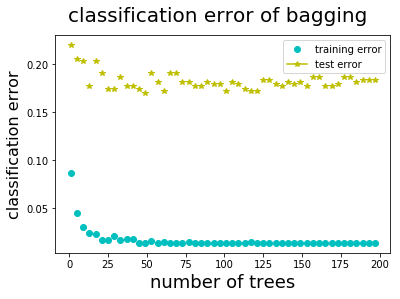

In [943]:
fig = plt.figure()
fig.suptitle('classification error of bagging', fontsize=20)
plt.xlabel('number of trees', fontsize=18)
plt.ylabel('classification error', fontsize=16)
fig.savefig('test.jpg')
for k in range(1,200,4):
    trainerror,testerror=bagprocess(X_train, y_train,X_test,y_test,n_estimators = k)
    #print k,trainerror,testerror
    plt.plot(k,trainerror,'co',k, testerror,'y*-')
    plt.legend(['training error','test error'])

In [944]:
bagprocess(X_train, y_train,X_test,y_test,n_estimators = 45)

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       549
          1       0.99      0.97      0.98       342

avg / total       0.99      0.99      0.99       891
             precision    recall  f1-score   support

          0       0.88      0.84      0.86       266
          1       0.74      0.79      0.76       152

avg / total       0.83      0.82      0.82       418

training accuracy is 0.986531986532 testing accuracy is 0.822966507177


(0.013468013468013518, 0.17703349282296654)

In [945]:
def rfprocess(X_train, y_train,X_test,y_test,n_estimators = 50): 
    randomf= RandomForestClassifier(n_estimators=k)
    randomf.fit(X_train,y_train)
    yrr_pred = randomf.predict(X_train)
    a=accuracy_score(y_train, yrr_pred)
    trainerror=1-a
    yre_pred = randomf.predict(X_test)
    a2=accuracy_score(y_test, yre_pred)
    testerror=1-a2
    print(classification_report(y_train, yrr_pred)),(classification_report(y_test, yre_pred))
    print 'training accuracy is',a,'  ','testing accuracy is',a2
    return trainerror,testerror

In [946]:
rfprocess(X_train, y_train,X_test,y_test,n_estimators =45)

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       549
          1       0.99      0.97      0.98       342

avg / total       0.99      0.99      0.99       891
             precision    recall  f1-score   support

          0       0.85      0.83      0.84       266
          1       0.72      0.75      0.73       152

avg / total       0.80      0.80      0.80       418

training accuracy is 0.986531986532    testing accuracy is 0.801435406699


(0.013468013468013518, 0.19856459330143539)

In [947]:
rfprocess(X1_train, y_train,X1_test,y_test,n_estimators =45)

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       549
          1       0.99      0.97      0.98       342

avg / total       0.98      0.98      0.98       891
             precision    recall  f1-score   support

          0       0.86      0.85      0.85       266
          1       0.74      0.76      0.75       152

avg / total       0.81      0.81      0.81       418

training accuracy is 0.982042648709    testing accuracy is 0.813397129187


(0.017957351290684653, 0.1866028708133971)

             precision    recall  f1-score   support

          0       0.92      0.94      0.93       549
          1       0.90      0.87      0.89       342

avg / total       0.91      0.91      0.91       891
             precision    recall  f1-score   support

          0       0.79      0.76      0.77       266
          1       0.61      0.64      0.62       152

avg / total       0.72      0.72      0.72       418

training accuracy is 0.914702581369    testing accuracy is 0.717703349282
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       549
          1       0.96      0.93      0.94       342

avg / total       0.96      0.96      0.96       891
             precision    recall  f1-score   support

          0       0.84      0.82      0.83       266
          1       0.70      0.74      0.72       152

avg / total       0.79      0.79      0.79       418

training accuracy is 0.957351290685    testing accuracy is 0.7894736

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       549
          1       0.99      0.97      0.98       342

avg / total       0.99      0.99      0.99       891
             precision    recall  f1-score   support

          0       0.85      0.82      0.83       266
          1       0.70      0.76      0.73       152

avg / total       0.80      0.79      0.80       418

training accuracy is 0.986531986532    testing accuracy is 0.794258373206
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       549
          1       0.99      0.97      0.98       342

avg / total       0.99      0.99      0.99       891
             precision    recall  f1-score   support

          0       0.85      0.84      0.84       266
          1       0.72      0.74      0.73       152

avg / total       0.81      0.80      0.80       418

training accuracy is 0.986531986532    testing accuracy is 0.8038277

training accuracy is 0.986531986532    testing accuracy is 0.796650717703
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       549
          1       0.99      0.97      0.98       342

avg / total       0.99      0.99      0.99       891
             precision    recall  f1-score   support

          0       0.85      0.84      0.84       266
          1       0.72      0.74      0.73       152

avg / total       0.81      0.80      0.80       418

training accuracy is 0.986531986532    testing accuracy is 0.803827751196
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       549
          1       0.99      0.97      0.98       342

avg / total       0.99      0.99      0.99       891
             precision    recall  f1-score   support

          0       0.85      0.82      0.84       266
          1       0.71      0.75      0.73       152

avg / total       0.80      0.80      0.80      

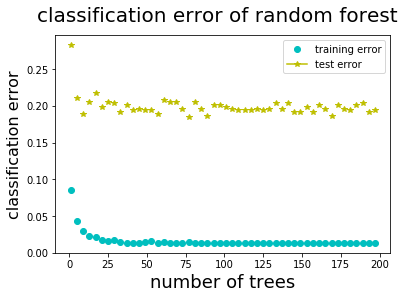

In [948]:
fig = plt.figure()
fig.suptitle('classification error of random forest', fontsize=20)
plt.xlabel('number of trees', fontsize=18)
plt.ylabel('classification error', fontsize=16)
fig.savefig('test.jpg')
for k in range(1,200,4):
    trainerror,testerror=rfprocess(X_train, y_train,X_test,y_test,n_estimators = k)
   # print k,trainerror,testerror
    plt.plot(k,trainerror,'co',k, testerror,'y*-')
    plt.legend(['training error','test error'])

In [949]:
randomf= RandomForestClassifier(n_estimators=45)
randomf.fit(X_train, y_train)
yrr_pred = randomf.predict(X_train)
a=accuracy_score(y_train, yrr_pred)
print(classification_report(y_train, yrr_pred))
print a

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       549
          1       0.99      0.97      0.98       342

avg / total       0.98      0.98      0.98       891

0.984287317621


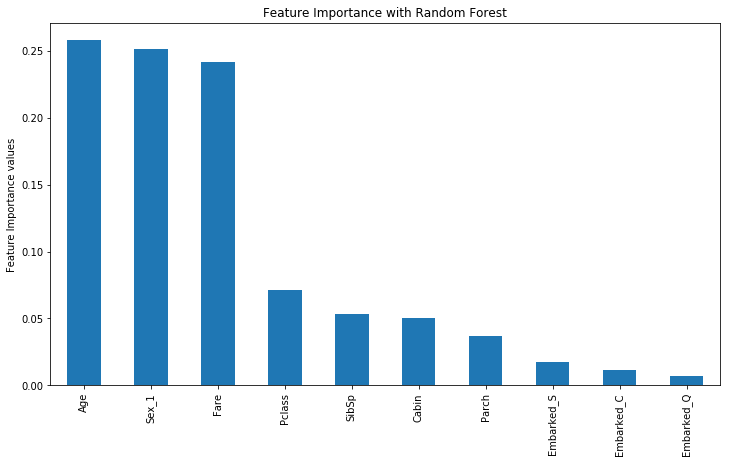

In [950]:
imp_feat_rf = pd.Series(randomf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
imp_feat_rf[:64].plot(kind='bar', title='Feature Importance with Random Forest', figsize=(12,8))
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)
plt.savefig('FeatImportance.png')
plt.show()